In [20]:
import numpy as np 
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt


In [21]:
def initialize_zeros(layer_dim):
    param = {}
    L=len(layer_dim)
    for i in range(1,L):
        param['W'+str(i)] = np.zeros((layer_dim[i],layer_dim[i-1]))
        param['b'+str(i)] = np.zeros((layer_dim[i],1))
    
    return param

In [22]:
def initialize_random(layer_random):
    param = {}
    np.random.seed(10)
    L= len(layer_random)
    for i in range(1,L):
        param['W'+str(i)] = np.random.randn(layer_random[i],layer_random[i-1])
        param['b'+str(i)] = np.zeros((layer_random[i],1))
    return param

In [23]:
def initialize_he(layer_random):
    param = {}
    np.random.seed(10)
    L= len(layer_random)
    for i in range(1,L):
        param['W'+str(i)] = np.random.randn(layer_random[i],layer_random[i-1])*np.sqrt(2/(layer_random[i-1]))
        param['b'+str(i)] = np.zeros((layer_random[i],1))
    return param

In [24]:
param=initialize_zeros([3,2,1])
print("W1 = "+str(param["W1"]))
print("b1 = "+str(param["b1"]))
print("W2 = "+str(param["W2"]))
print("b1 = "+str(param["b1"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b1 = [[0.]
 [0.]]


In [25]:
def load_dataset():
    np.random.seed(1)
    (train_x,train_y) = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    (test_x,test_y) = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    plt.scatter(train_x[:,0],train_x[:,1],c=train_y,cmap=plt.cm.Spectral)
    plt.scatter(test_x[:,0],test_x[:,1],c=test_y,cmap=plt.cm.Spectral)
    train_x=train_x.T
    test_x=test_x.T
    train_y = train_y.reshape((1,-1))
    test_y = test_y.reshape((1,-1))
    return train_x,train_y,test_x,test_y

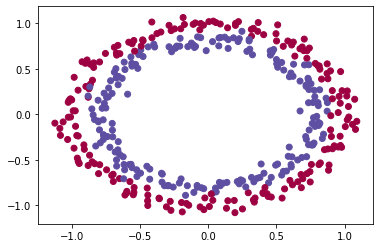

In [26]:
train_x,train_y,test_x,test_y = load_dataset()

In [27]:
def relu(x):
    return np.maximum(0,x)
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [28]:
def fwd_propagation(X,param):
    W1 = param["W1"]
    b1 = param["b1"]
    W2 = param["W2"]
    b2 = param["b2"]
    W3 = param["W3"]
    b3 = param["b3"]
    
    z1 = np.dot(W1,X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3,a2) + b3
    a3 = sigmoid(z3)
    
    cache = (W1,W2,W3,b1,b2,b3,z1,a1,z2,a2,z3,a3)
    return cache,a3

In [29]:
def bkwd_propagation(X,Y,cache):
    m = X.shape[0]
    (W1,W2,W3,b1,b2,b3,z1,a1,z2,a2,z3,a3) = cache
    #compute dw and db for sigmoid 
    dz3 = 1/m*(a3-Y)
    dw3 = np.dot(dz3,a2.T)
    db3 = np.sum(dz3,axis=1, keepdims = True)
    
    #compute dw and db for relu
    da2 = np.dot(W3.T,dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dw2 = np.dot(dz2,a1.T)
    db2 = np.sum(dz2,axis=1, keepdims = True)
    
    da1 = np.dot(W2.T,dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dw1 = np.dot(dz1,X.T)
    db1 = np.sum(dz1,axis=1, keepdims = True)

    gradient = {"dz3" : dz3,"dw3" : dw3,"db3" : db3,"dz2" : dz2,"dw2" : dw2,"db2" : db2,"dz1" : dz1,"dw1" : dw1,"db1" : db1}
    return gradient
    

In [30]:
def compute_cost(a3,Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    return loss

In [31]:
def update_parameters(parameters,grads,learning_rate):
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dw" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters


In [34]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization="he"):
    
    grads = {}
    costs = [] 
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        parameters = initialize_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_he(layers_dims)

    
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        cache,a3 = fwd_propagation(X, parameters)
        cost = compute_cost(a3, Y)
        grads = bkwd_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per thousand)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [39]:
def predict(X,Y,parameters):
    m=X.shape[1]
    p=np.zeros((1,m),dtype=int)
    cache, a3 = fwd_propagation(X,parameters)
    # dimension of a3 = (1,m)
    for i in range(0,a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
        
    print("Accuracy= " +str(np.mean((p[0,:]==Y[0,:]))))
    return p
        
    

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599453
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


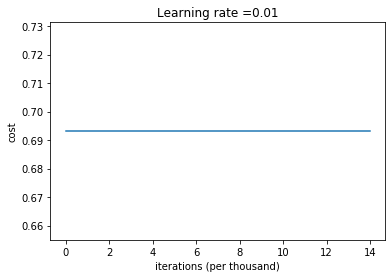

On the train set:
Accuracy= 0.5
On the train set:
Accuracy= 0.5


In [40]:
parameters = model(train_x, train_y, initialization = "zeros")
print ("On the train set:")
prediction_train = predict(train_x, train_y,parameters)
print ("On the train set:")
prediction_test = predict(test_x, test_y,parameters)


Cost after iteration 0: 1.1897082341545988
Cost after iteration 1000: 0.03274740244745411
Cost after iteration 2000: 0.026031789532064604
Cost after iteration 3000: 0.011722813042821929
Cost after iteration 4000: 0.010451059488245016
Cost after iteration 5000: 0.009550071494589366
Cost after iteration 6000: 0.009134843429206006
Cost after iteration 7000: 0.008531006346435853
Cost after iteration 8000: 0.007853619714535276


C:\Users\feroz\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\feroz\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Cost after iteration 9000: 0.4880459574260985
Cost after iteration 10000: 0.4863242760855724
Cost after iteration 11000: 0.48729409835222093
Cost after iteration 12000: 0.48711254114623487
Cost after iteration 13000: 0.4859681161854726
Cost after iteration 14000: 0.4832503162237046


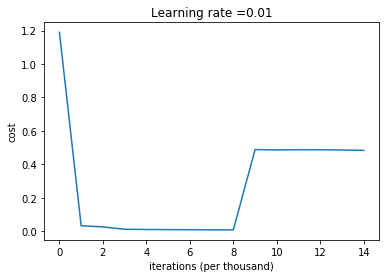

On the train set:
Accuracy= 0.78
On the train set:
Accuracy= 0.78


In [41]:
parameters = model(train_x, train_y, initialization = "random")
print ("On the train set:")
prediction_train = predict(train_x, train_y,parameters)
print ("On the train set:")
prediction_test = predict(test_x, test_y,parameters)


Cost after iteration 0: 0.7616195472091505
Cost after iteration 1000: 0.03248149082260827
Cost after iteration 2000: 0.027791888407667335
Cost after iteration 3000: 0.024272234522447856
Cost after iteration 4000: 0.015670520886430363
Cost after iteration 5000: 0.013487960642177563
Cost after iteration 6000: 0.012515284244717182
Cost after iteration 7000: 0.011927815439414282
Cost after iteration 8000: 0.011184394919593065
Cost after iteration 9000: 0.010696172111009537
Cost after iteration 10000: 0.010333968062478365
Cost after iteration 11000: 0.01006712303328533
Cost after iteration 12000: 0.009892896351593667
Cost after iteration 13000: 0.010318532686129766
Cost after iteration 14000: 0.010162329932689347


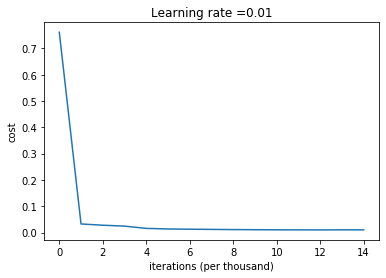

On the train set:
On the train set:
Accuracy= 0.9966666666666667
On the train set:
Accuracy= 0.95


In [42]:
parameters = model(train_x, train_y, initialization = "he")
print ("On the train set:")
print ("On the train set:")
prediction_train = predict(train_x, train_y,parameters)
print ("On the train set:")
prediction_test = predict(test_x, test_y,parameters)
